In [ ]:
# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice 
#! pip3 install --force-reinstall matplotlib==3.7.0
# ! pip3 install setuptools

In [50]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fftshift
from scipy.signal import square, ShortTimeFFT
from scipy.signal.windows import gaussian
import soundfile as sf

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import IPython.display as ipd

In [4]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("phrase.wav",sr,recording)

recording...............


In [12]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('phrase_1.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


Text(126.09722222222221, 0.5, 'amplitude')

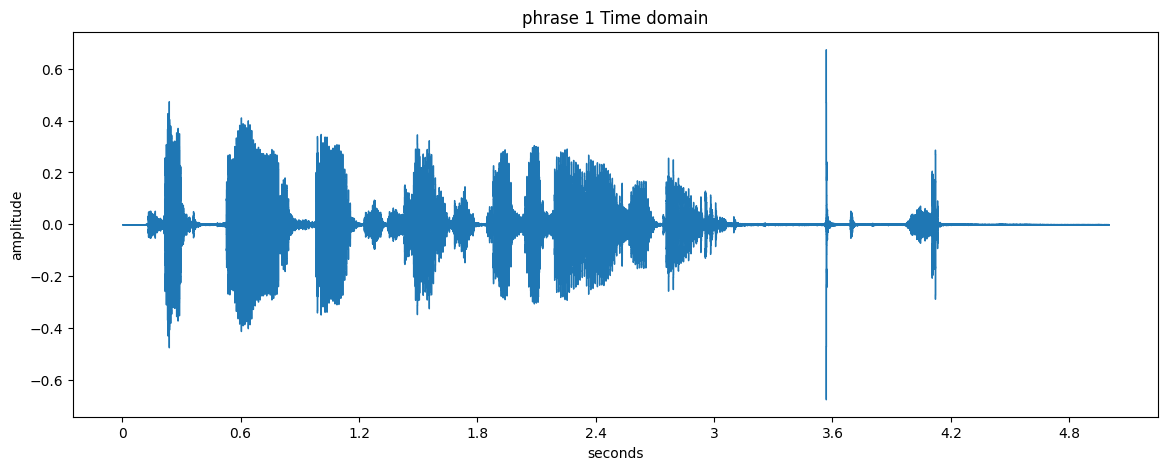

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('phrase 1 Time domain')
plt.xlabel('seconds')
plt.ylabel('amplitude')

(220000,)
44000
(1025, 430)


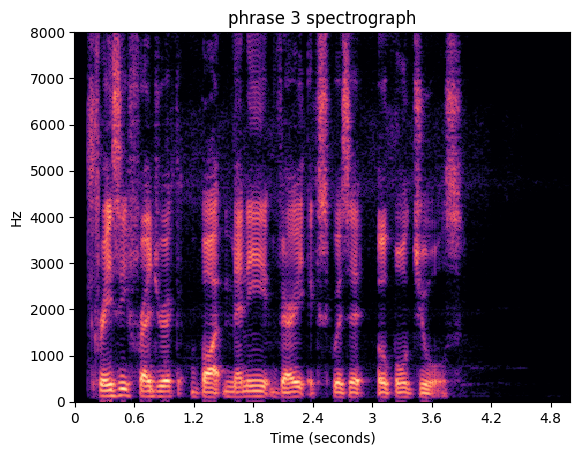

In [125]:
#spectrogram
data, sampling_rate = librosa.load("phrase_3.wav", sr = 44000)
print(data.shape)
print(sampling_rate)

freq = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
print(freq.shape)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
ax.set_ylim(ymax=8000)
plt.title('phrase 3 spectrograph')
librosa.display.specshow(freq, y_axis='linear', x_axis='s',sr=sampling_rate,ax=ax)



In [136]:
def apply_sound_delay(wav_file, delay_samples, output_file=None):
    data, sr = librosa.load(wav_file)

    # Ensure stereo signal
    if data.ndim == 1:
        data = np.tile(data, (2, 1))

    # Apply delay to the second channel
    delayed_channel = np.roll(data[0], delay_samples)
    delayed_signal = np.stack((data[1], delayed_channel), axis=0)

    # Save the result (using librosa for consistency)
    if output_file:
        sf.write(output_file, delayed_signal.T, sr)
    else:
        sf.write(wav_file, delayed_signal.T, sr)  # Overwrite original

In [147]:
delay_ms = 100 # Delay in milliseconds
delay_samples = int(44100 * (delay_ms / 1000)) 

apply_sound_delay('phrase_2.wav', delay_samples, 'teamSpencer-sterosoundfile-100.wav')

In [130]:
def attenuate_right_channel(input_file, output_file, db_attenuation):
    # Load the audio data and sample rate
    data, sr = librosa.load(input_file, mono=False)  # Load as stereo

    if data.ndim == 1:
        data = np.tile(data, (2, 1))

    # Convert dB attenuation to a linear gain factor
    gain_factor = 10 ** (-db_attenuation / 20)

    # Apply attenuation to the right channel
    data[:1] *= gain_factor 

    # Save the modified audio data to a new WAV file (using soundfile)
    sf.write(output_file, data.T, sr)  # Transpose for correct stereo format

In [150]:
# Example usage (remains the same)
input_file = 'phrase_2.wav'
output_file = 'teamSpencer-sterosoundfile-0-20.wav'
attenuation_db = -20 # Attenuate by 3 dB
attenuate_right_channel(input_file, output_file, attenuation_db)